In [ ]:
#AI Trainer for the Adjustments Project


In [26]:
#Load input data
import pandas as pd
import numpy as np

#Load data
df=pd.read_csv('SampleData.csv')
df.head(10)

,AdjustmentType,AdjustmentName,AdjustedField,Drawn,Undrawn,PD,CustomerID,CustomerType,RiskCategory,IsDefaulted,CountryCode,NewVal
0,Amend,BREXIT,RiskCategory,583970,452225,0.29,CUST238947,SME,Low,0,GB,Medium
1,Amend,Noise_256n,RiskCategory,121411,148936,0.15,CUST981372,Retail,Low,0,US,Medium
2,Amend,Noise_22d,CountryCode,26484,440911,0.54,CUST103289,SME,Medium,1,DE,US
3,Amend,German Retail Downturn,RiskCategory,281753,888893,0.72,CUST450896,Retail,Low,1,DE,Medium
4,Amend,Market Downturn,PD,384102,638418,0.62,CUST192654,Corporate,High,1,US,0.75
5,Amend,Market Downturn,PD,612630,132375,0.28,CUST238947,Corporate,High,1,US,0.75
6,Amend,BREXIT_DEFAULTED,RiskCategory,574280,306005,0.65,CUST450896,Retail,Medium,1,GB,High
7,Amend,Market Downturn,PD,812601,405517,0.07,CUST981372,Corporate,High,0,GB,0.75
8,Amend,Noise_256n,CountryCode,532888,929707,0.68,CUST450896,Retail,Medium,0,US,US
9,Amend,Noise_6f,IsDefaulted,397012,906575,0.54,CUST103289,Corporate,Medium,1,DE,1


In [28]:
#Stage 1: OneHot encode string inputs and labels so we can use them in the model

#Build list of all string columns in the dataframe
string_columns=[]
for col in df.columns:
    if df[col].dtype=='object':
        string_columns.append(col)

#Turn output labels into numbers
outputLabels=df["NewVal"].unique()
# #Create a dictionary to map the output labels to numbers
outputLabelsDict={}
for i in range(len(outputLabels)):
    outputLabelsDict[outputLabels[i]]=i
df["NewVal"]=df["NewVal"].map(outputLabelsDict)

df_encoded=pd.get_dummies(df, columns=string_columns)

#Move NewVal to the end of the dataframe
df_encoded=df_encoded[[c for c in df_encoded if c not in ['NewVal']] + ['NewVal']]

df_encoded


,Drawn,Undrawn,PD,IsDefaulted,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,...,CustomerType_Corporate,CustomerType_Retail,CustomerType_SME,RiskCategory_High,RiskCategory_Low,RiskCategory_Medium,CountryCode_DE,CountryCode_GB,CountryCode_US,NewVal
0,583970,452225,0.29,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,121411,148936,0.15,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,26484,440911,0.54,1,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
3,281753,888893,0.72,1,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,384102,638418,0.62,1,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,288379,199039,0.66,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,13
19996,9241,684895,0.43,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,12
19997,540339,912720,0.61,1,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,5
19998,421934,915947,0.55,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [29]:
#Detach the NewVal column and onehot encode it!
labelF=df_encoded["NewVal"]
df_encoded=df_encoded.drop(columns=["NewVal"])

labelF=pd.get_dummies(labelF)
labelF

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Stage 2: Normalize all numeric values
#Normalize the dataframe

#Normalize Drawn (-1 to 1)
df_normalized=df_encoded.copy()
df_normalized["Drawn"]=(df_encoded["Drawn"]-df_encoded["Drawn"].min())/(df_encoded["Drawn"].max()-df_encoded["Drawn"].min())*2-1
#Normalize Undrawn (-1 to 1)
df_normalized["Undrawn"]=(df_encoded["Undrawn"]-df_encoded["Undrawn"].min())/(df_encoded["Undrawn"].max()-df_encoded["Undrawn"].min())*2-1

#Clip PD to 0-1
df_normalized["PD"]=df_normalized["PD"].clip(0,1)


df_normalized

,Drawn,Undrawn,PD,IsDefaulted,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,...,CustomerID_CUST981372,CustomerType_Corporate,CustomerType_Retail,CustomerType_SME,RiskCategory_High,RiskCategory_Low,RiskCategory_Medium,CountryCode_DE,CountryCode_GB,CountryCode_US
0,0.167833,-0.095481,0.29,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,-0.757435,-0.702151,0.15,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2,-0.947319,-0.118112,0.54,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,-0.436699,0.777988,0.72,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,-0.231968,0.276962,0.62,1,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.423445,-0.601929,0.66,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
19996,-0.981811,0.369930,0.43,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
19997,0.080557,0.825649,0.61,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
19998,-0.156291,0.832104,0.55,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [19]:
print(len(df_normalized))
print(len(labelF))

20000
20000


In [31]:
#Turn the pandas dataframe into a numpy array, split out the label and then break into sets
import tensorflow as tf

#turn df_normalized into a normal array
data=df_normalized.values

#Get all columns except the output column
X=data[:,1:]

#Get the output column
data=labelF.values
y=data[:,:]


from sklearn.model_selection import train_test_split
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [8]:
print(len(X))
print(len(y))

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


4000
4000
3200
800
3200
800


In [32]:
#Time to build the model

#------------------PARAMETERS------------------
neurons=200
num_classes=23
totalepochs=80


#Simple feed-forward model. No U-nets or anything fancy
ann = tf.keras.models.Sequential()


#Input and first hidden layer
ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))

#Add a dropout layer to prevent overfitting
ann.add(tf.keras.layers.Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))




#Output layer
#Classifier head
ann.add(tf.keras.layers.Dense(units=num_classes, activation='sigmoid'))
# ann.add(tf.keras.layers.Flatten())
# ann.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


#Compile!
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.build(input_shape=(None, X_train.shape[1]))
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               8400      
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 200)               40200     
                                                                 
 dense_14 (Dense)            (None, 200)               40200     
                                                                 
 dense_15 (Dense)            (None, 23)                4623      
                                                                 
Total params: 93,423
Trainable params: 93,423
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Train the MODEL!!!!!


#y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))


ann.fit(X_train, y_train, batch_size = 32, epochs = totalepochs)

Epoch 1/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0596 - accuracy: 0.7114
Epoch 2/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0334 - accuracy: 0.7616
Epoch 3/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0326 - accuracy: 0.7694
Epoch 4/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0325 - accuracy: 0.7693
Epoch 5/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0322 - accuracy: 0.7679
Epoch 6/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0321 - accuracy: 0.7705
Epoch 7/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0318 - accuracy: 0.7757
Epoch 8/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0317 - accuracy: 0.7776
Epoch 9/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0315 - accuracy: 0.7799
Epoch 10/80
500/500 [==============================] - 1s 1ms/step - loss: 0.0312 - accuracy: 0.7851

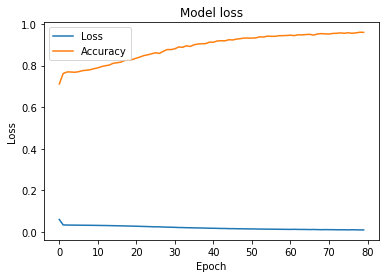

In [34]:
#Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(ann.history.history['loss'])
plt.plot(ann.history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()



In [35]:
#Validate the model against the test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

#Get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


125/125 [==============================] - 0s 585us/step


0.7405

In [13]:
#Weightwatcher
import weightwatcher as ww
watcher = ww.WeightWatcher(model=ann)
results = watcher.analyze()
results



,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,rf,sigma,spectral_norm,stable_rank,status,sv_max,warning,weak_rank_loss,xmax,xmin
0,0,dense,0.060973,40,200,5.000000,3.371500,6.611302,0.967056,True,...,1,0.612319,91.4375,8.382812,success,9.562500,,0,91.4375,20.750000
1,2,dense_1,0.085757,200,200,1.000000,5.077870,11.504550,1.002767,True,...,1,1.289536,184.3750,17.156250,success,13.578125,,0,184.3750,65.000000
2,3,dense_2,0.086783,200,200,1.000000,2.040119,4.514561,0.987516,True,...,1,0.128030,163.0000,17.078125,success,12.765625,,0,163.0000,10.445312
3,4,dense_3,0.047235,23,200,8.695652,2.243171,6.120526,0.828203,True,...,1,0.271282,535.5000,3.160156,success,23.140625,,0,535.5000,22.156250
